<a href="https://colab.research.google.com/github/DanielAdam1992/Classic-ML---Ecommerce-Project-/blob/main/eCommerce_project_New.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Which Criteria predicts potential return clients (Previous Purchases)

#The Model will be used by the Marketing Teams to **Optimize budget & resouce allocation**  

#Dataset Insallation

In [ ]:
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "customer_details.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "ahmedaliraja/e-commerece-sales-data-2023-24",
  file_path,
  # Provide any additional arguments like
  # sql_query or pandas_kwargs. See the
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

df.head()

/tmp/ipython-input-28688703.py:10: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  df = kagglehub.load_dataset(


100%|██████████| 407k/407k [00:00<00:00, 21.0MB/s]


,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


#Library installation




In [ ]:
#!pip install pandas
import pandas as pd
#!pip install numpy
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
import pickle



#Data Preparation

## Data uploading and first overview

In [ ]:
#Checking Data Rows and Columns
df.shape

(3900, 18)

In [ ]:
#Checking DF core informtiona - Columns name, nulls(if any) and Dtypes.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

##Customer Details DF OverView





###Columns Checking and Understanding

In [ ]:
#Data frame 5 first rows to view
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [ ]:
df.columns # Columns names

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Shipping Type',
       'Discount Applied', 'Promo Code Used', 'Previous Purchases',
       'Payment Method', 'Frequency of Purchases'],
      dtype='object')

In [ ]:
#Checking for nulls values:
df.isnull().sum().sum()


np.int64(0)

no nulls in all the data frame columns

In [ ]:
df.describe() #descriptive statistics of the DataFrame's column

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


###Clean Text and Arrangment

In [ ]:
# LowerCasing the entire DataFrame and remove spaces with dots.
df = df.applymap(lambda x: x.lower() if isinstance(x, str) else x)
df.columns = df.columns.str.lower().str.replace(' ', '_').str.replace('.', '', regex=False)
df.head(5)

,customer_id,age,gender,item_purchased,category,purchase_amount_(usd),location,size,color,season,review_rating,subscription_status,shipping_type,discount_applied,promo_code_used,previous_purchases,payment_method,frequency_of_purchases
0,1,55,male,blouse,clothing,53,kentucky,l,gray,winter,3.1,yes,express,yes,yes,14,venmo,fortnightly
1,2,19,male,sweater,clothing,64,maine,l,maroon,winter,3.1,yes,express,yes,yes,2,cash,fortnightly
2,3,50,male,jeans,clothing,73,massachusetts,s,maroon,spring,3.1,yes,free shipping,yes,yes,23,credit card,weekly
3,4,21,male,sandals,footwear,90,rhode island,m,maroon,spring,3.5,yes,next day air,yes,yes,49,paypal,weekly
4,5,45,male,blouse,clothing,49,oregon,m,turquoise,spring,2.7,yes,free shipping,yes,yes,31,paypal,annually


###Reducing Large Categories

Checking columns to reduce using function:

In [ ]:
#Checking columns to reduce using function:

#df["location"].value_counts()
#df["shipping.type"].value_counts()
#df['payment.method'].value_counts()
#df['category'].value_counts()

def analyze_categorical_features(df, column_list):


 # cheking through each column in the provided list
    for col in column_list:

        # Check if the column exists in the DataFrame
        if col in df.columns:

            # Print separator and column name
            print(f"\n======== {col.upper()} ========")
            print(f"** Analyzing Column: {col} **")
            print("====================================")

            # Print raw value counts
            print("Raw Counts:")
            print(df[col].value_counts())

            # Print value counts as percentages
            print("\nPercentage Counts:")
            # normalize=True calculates the relative frequency (percentage)
            print(df[col].value_counts(normalize=True).mul(100).round(1).astype(str) + '%')

        else:
            # Print a warning if the column is not found
            print(f"!!! WARNING: Column '{col}' not found in DataFrame.")

analyze_categorical_features(df, ['item_purchased', 'category',
                                     'purchase_amount_(usd)',
                                     'location','size', 'color',
                                     'season', 'review_rating',
                                     'subscription_status',
                                     'shipping_type',
                                     'discount_applied',
                                     'promo_code_used',
                                     'previous_purchases',
                                     'payment_method',
                                     'frequency_of_purchases']
                                     )


======== ITEM_PURCHASED ========
** Analyzing Column: item_purchased **
Raw Counts:
item_purchased
blouse        171
pants         171
jewelry       171
shirt         169
dress         166
sweater       164
jacket        163
coat          161
sunglasses    161
belt          161
sandals       160
socks         159
skirt         158
scarf         157
shorts        157
hat           154
handbag       153
hoodie        151
shoes         150
t-shirt       147
sneakers      145
boots         144
backpack      143
gloves        140
jeans         124
Name: count, dtype: int64

Percentage Counts:
item_purchased
blouse        4.4%
pants         4.4%
jewelry       4.4%
shirt         4.3%
dress         4.3%
sweater       4.2%
jacket        4.2%
coat          4.1%
sunglasses    4.1%
belt          4.1%
sandals       4.1%
socks         4.1%
skirt         4.1%
scarf         4.0%
shorts        4.0%
hat           3.9%
handbag       3.9%
hoodie        3.9%
shoes         3.8%
t-shirt       3.8%
sneakers 

In [ ]:
df

,customer_id,age,gender,item_purchased,category,purchase_amount_(usd),location,size,color,season,review_rating,subscription_status,shipping_type,discount_applied,promo_code_used,previous_purchases,payment_method,frequency_of_purchases
0,1,55,male,blouse,clothing,53,kentucky,l,gray,winter,3.1,yes,express,yes,yes,14,venmo,fortnightly
1,2,19,male,sweater,clothing,64,maine,l,maroon,winter,3.1,yes,express,yes,yes,2,cash,fortnightly
2,3,50,male,jeans,clothing,73,massachusetts,s,maroon,spring,3.1,yes,free shipping,yes,yes,23,credit card,weekly
3,4,21,male,sandals,footwear,90,rhode island,m,maroon,spring,3.5,yes,next day air,yes,yes,49,paypal,weekly
4,5,45,male,blouse,clothing,49,oregon,m,turquoise,spring,2.7,yes,free shipping,yes,yes,31,paypal,annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,female,hoodie,clothing,28,virginia,l,turquoise,summer,4.2,no,2-day shipping,no,no,32,venmo,weekly
3896,3897,52,female,backpack,accessories,49,iowa,l,white,spring,4.5,no,store pickup,no,no,41,bank transfer,bi-weekly
3897,3898,46,female,belt,accessories,33,new jersey,l,green,spring,2.9,no,standard,no,no,24,venmo,quarterly
3898,3899,44,female,shoes,footwear,77,minnesota,s,brown,summer,3.8,no,express,no,no,24,venmo,weekly


Reducing Categories

In [ ]:
#Reducing Large Categories: age, review, Shipping type, payment method, purchase.amount.(usd), previous.purchases, frequency.of.purchases, location

#age reducing
bins = [0, 18, 25, 35, 50, 60, np.inf]
labels = ['0-17','18-24','25-34','35-49','50-59', '60+']
df['age_range'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

#review rounding
bins = [0, 1, 2, 3, 4, 5, np.inf]
labels = ['0','1','2','3','4','5']
df['review_range'] = pd.cut(df['review_rating'], bins=bins, labels=labels, right=False)

#Shipping type - all 'fast' shipping method to be combined
df["shipping_group"] = df["shipping_type"]
fast_shipping = ["express", "next day air", "2-day shipping"]
df.loc[df['shipping_type'].isin(fast_shipping), 'shipping-group'] = 'fast'

#payment method - reduced to different type of methods
payment_map = { #making relevant dict
    'paypal': 'digital_wallet',
    'credit card': 'traditional_banking',
    'cash': 'phsical_or_other',
    'debit card': 'traditional_banking',
    'venmo': 'digital_wallet',
    'bank transfer': 'traditional_banking'
}

df['payment_group'] = df['payment_method'].replace(payment_map)

#purchase.amount.(usd) reducing using labels
bins = [0, 25, 50, 75, 101, np.inf]
labels = ['0-24', '25-49', '50-74', '75-100', '100+' ]
df['purchase_amount_range_(usd)'] = pd.cut(df['purchase_amount_(usd)'], bins=bins, labels=labels, right=False)

#previous.purchases grouping using labels
bins = [0, 11, 21, 31, 41, 51, np.inf]
labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51+']
df['previous_purchases_range'] = pd.cut(df['previous_purchases'], bins=bins, labels=labels, right=False)

#frequency.of.purchases - combining same categories and mapping:

frequency_map_grouping = {          #making relevant dict
    'every 3 months': 'quarterly',
    'fortnightly': 'bi-weekly',
    'quarterly': 'quarterly',
    'annually': 'annually',
    'monthly': 'monthly',
    'bi-weekly': 'bi-weekly',
    'weekly': 'weekly'
}

df['frequency_group'] = df['frequency_of_purchases'].replace(frequency_map_grouping)



#location reducing - states to main region:
state_to_region = { #making relevant dict
    #Northeast
    'new york': 'northeast',
    'massachusetts': 'northeast',
    'vermont': 'northeast',
    'maine': 'northeast',
    'connecticut': 'northeast',
    'rhode island': 'northeast',
    'new hampshire': 'northeast',
    'new jersey': 'northeast',
    'pennsylvania': 'northeast',
    'delaware': 'northeast',
    #South
    'alabama': 'south',
    'mississippi': 'south',
    'kentucky': 'south',
    'arkansas': 'south',
    'louisiana': 'south',
    'tennessee': 'south',
    'georgia': 'south',
    'florida': 'south',
    'north carolina': 'south',
    'south carolina': 'south',
    'virginia': 'south',
    'west virginia': 'south',
    'maryland': 'south',
    'texas': 'south',
    'oklahoma': 'south',

    #Midwest
    'illinois': 'midwest',
    'minnesota': 'midwest',
    'nebraska': 'midwest',
    'ohio': 'midwest',
    'wisconsin': 'midwest',
    'iowa': 'midwest',
    'kansas': 'midwest',
    'north dakota': 'midwest',
    'south dakota': 'midwest',
    'indiana': 'midwest',
    'michigan': 'midwest',
    'missouri': 'midwest',

    #West
    'montana': 'west',
    'idaho': 'west',
    'california': 'west',
    'nevada': 'west',
    'new mexico': 'west',
    'utah': 'west',
    'wyoming': 'west',
    'oregon': 'west',
    'washington': 'west',
    'alaska': 'west',
    'hawaii': 'west',
    'colorado': 'west',
    'arizona': 'west'
}

df['us_region'] = df['location'].map(state_to_region)


df.head()

,customer_id,age,gender,item_purchased,category,purchase_amount_(usd),location,size,color,season,...,frequency_of_purchases,age_range,review_range,shipping_group,shipping-group,payment_group,purchase_amount_range_(usd),previous_purchases_range,frequency_group,us_region
0,1,55,male,blouse,clothing,53,kentucky,l,gray,winter,...,fortnightly,50-59,3,express,fast,digital_wallet,50-74,11-20,bi-weekly,south
1,2,19,male,sweater,clothing,64,maine,l,maroon,winter,...,fortnightly,18-24,3,express,fast,phsical_or_other,50-74,0-10,bi-weekly,northeast
2,3,50,male,jeans,clothing,73,massachusetts,s,maroon,spring,...,weekly,50-59,3,free shipping,NaN,traditional_banking,50-74,21-30,weekly,northeast
3,4,21,male,sandals,footwear,90,rhode island,m,maroon,spring,...,weekly,18-24,3,next day air,fast,digital_wallet,75-100,41-50,weekly,northeast
4,5,45,male,blouse,clothing,49,oregon,m,turquoise,spring,...,annually,35-49,2,free shipping,NaN,digital_wallet,25-49,31-40,annually,west


###Data Manipulation

In [ ]:
#Checking Data columns after reducing cat
df.columns

Index(['customer_id', 'age', 'gender', 'item_purchased', 'category',
       'purchase_amount_(usd)', 'location', 'size', 'color', 'season',
       'review_rating', 'subscription_status', 'shipping_type',
       'discount_applied', 'promo_code_used', 'previous_purchases',
       'payment_method', 'frequency_of_purchases', 'age_range', 'review_range',
       'shipping_group', 'shipping-group', 'payment_group',
       'purchase_amount_range_(usd)', 'previous_purchases_range',
       'frequency_group', 'us_region'],
      dtype='object')

In [ ]:
#Estimate Customer Monetary Value:
df['estimate_clv'] = df['previous_purchases'] * df['purchase_amount_(usd)']
# adding new feature that might assist with prediction


df['estimate_clv'].describe()


,estimate_clv
count,3900.000000
mean,1517.876923
std,1116.943053
min,21.000000
25%,619.000000
50%,1278.000000
75%,2211.750000
max,5000.000000


In [ ]:
df.shape # New columns

(3900, 28)

In [ ]:
df.columns # confirms all new columns recevied.

Index(['customer_id', 'age', 'gender', 'item_purchased', 'category',
       'purchase_amount_(usd)', 'location', 'size', 'color', 'season',
       'review_rating', 'subscription_status', 'shipping_type',
       'discount_applied', 'promo_code_used', 'previous_purchases',
       'payment_method', 'frequency_of_purchases', 'age_range', 'review_range',
       'shipping_group', 'shipping-group', 'payment_group',
       'purchase_amount_range_(usd)', 'previous_purchases_range',
       'frequency_group', 'us_region', 'estimate_clv'],
      dtype='object')

In [ ]:
df.info() # new Core Data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 28 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   customer_id                  3900 non-null   int64   
 1   age                          3900 non-null   int64   
 2   gender                       3900 non-null   object  
 3   item_purchased               3900 non-null   object  
 4   category                     3900 non-null   object  
 5   purchase_amount_(usd)        3900 non-null   int64   
 6   location                     3900 non-null   object  
 7   size                         3900 non-null   object  
 8   color                        3900 non-null   object  
 9   season                       3900 non-null   object  
 10  review_rating                3900 non-null   float64 
 11  subscription_status          3900 non-null   object  
 12  shipping_type                3900 non-null   object  
 13  dis

###Relevant Count Plots for Visualisation

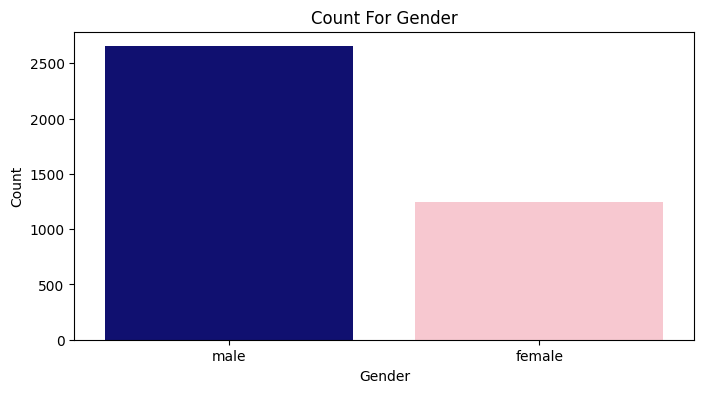

In [ ]:
#gender:

custom_color = ['navy','pink']

plt.figure(figsize=(8, 4))
sns.countplot(x='gender', data=df, order=['male', 'female'], palette=custom_color)
plt.title('Count For Gender')
plt.ylabel('Count')
plt.xlabel('Gender')
plt.show()

There are more males than females.

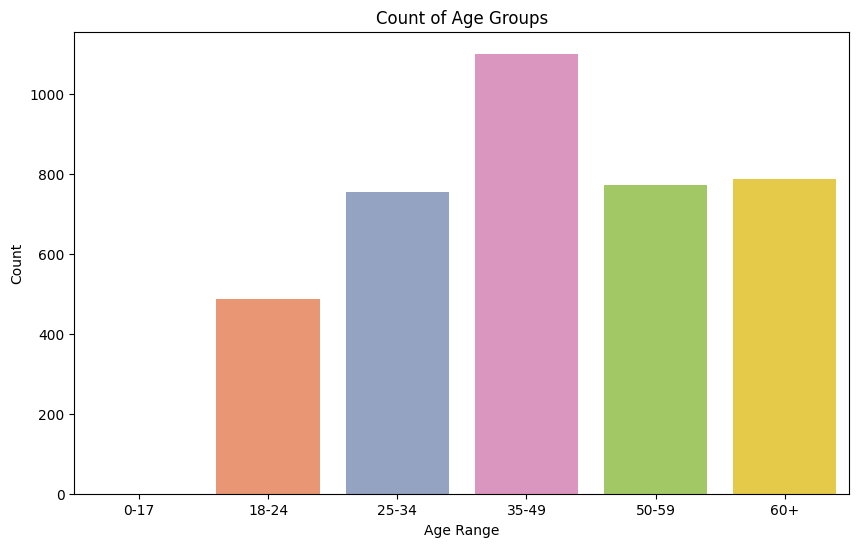

In [ ]:
#age range:

plt.figure(figsize=(10, 6))
sns.countplot(x='age_range', data=df, order=['0-17','18-24','25-34','35-49','50-59', '60+',], palette='Set2')
plt.title('Count of Age Groups')
plt.xlabel('Age Range')
plt.ylabel('Count')
plt.show()


The biggest group is 35-49 years old. We split the Data like this to show group with similar life status.  

In [ ]:
set(df['age_range']) # We can see that our data does not contians any 0-17 values.

{'18-24', '25-34', '35-49', '50-59', '60+'}

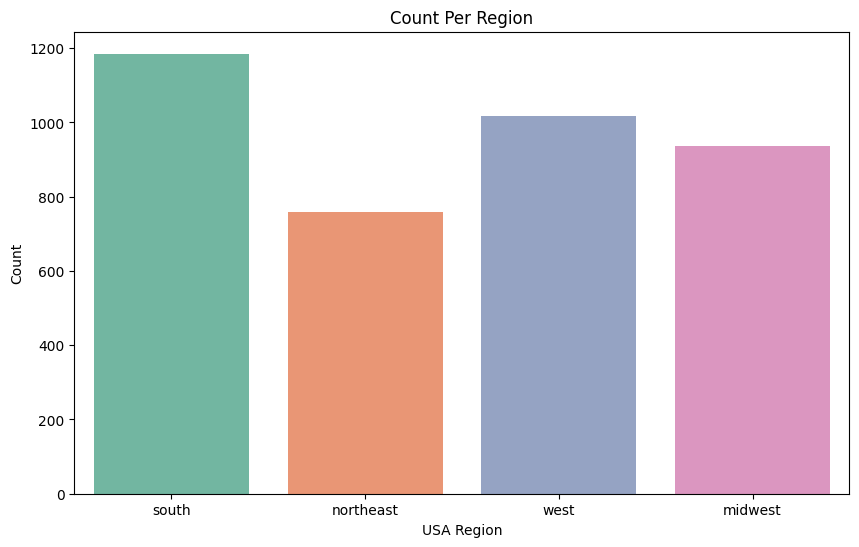

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='us_region', data=df, palette='Set2')
plt.title('Count Per Region')
plt.xlabel('USA Region')
plt.ylabel('Count')
plt.show()

We can see that the region groups divided in good, even way.

Saving Manipulated Data

In [ ]:
#Write a pickle file
with open('df_after_data_prep.pkl', 'wb') as f:
    pickle.dump(df, f)

print("eCommerce Project dataset saved as pickle file")

eCommerce Project dataset saved as pickle file


In [ ]:
# for reading the data after prep, uncomment below cell

In [ ]:
# #Read a pickle file and load the data
# with open('df_after_data_prep.pkl', 'rb') as file:
#     df = pickle.load(file)


#EDA - Exploratory Data Analysis

## Data Overview

In [ ]:
df.head()

,customer_id,age,gender,item_purchased,category,purchase_amount_(usd),location,size,color,season,...,age_range,review_range,shipping_group,shipping-group,payment_group,purchase_amount_range_(usd),previous_purchases_range,frequency_group,us_region,estimate_clv
0,1,55,male,blouse,clothing,53,kentucky,l,gray,winter,...,50-59,3,express,fast,digital_wallet,50-74,11-20,bi-weekly,south,742
1,2,19,male,sweater,clothing,64,maine,l,maroon,winter,...,18-24,3,express,fast,phsical_or_other,50-74,0-10,bi-weekly,northeast,128
2,3,50,male,jeans,clothing,73,massachusetts,s,maroon,spring,...,50-59,3,free shipping,NaN,traditional_banking,50-74,21-30,weekly,northeast,1679
3,4,21,male,sandals,footwear,90,rhode island,m,maroon,spring,...,18-24,3,next day air,fast,digital_wallet,75-100,41-50,weekly,northeast,4410
4,5,45,male,blouse,clothing,49,oregon,m,turquoise,spring,...,35-49,2,free shipping,NaN,digital_wallet,25-49,31-40,annually,west,1519


In [ ]:
df.shape

(3900, 28)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 28 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   customer_id                  3900 non-null   int64   
 1   age                          3900 non-null   int64   
 2   gender                       3900 non-null   object  
 3   item_purchased               3900 non-null   object  
 4   category                     3900 non-null   object  
 5   purchase_amount_(usd)        3900 non-null   int64   
 6   location                     3900 non-null   object  
 7   size                         3900 non-null   object  
 8   color                        3900 non-null   object  
 9   season                       3900 non-null   object  
 10  review_rating                3900 non-null   float64 
 11  subscription_status          3900 non-null   object  
 12  shipping_type                3900 non-null   object  
 13  dis

In [ ]:
df.describe()

,customer_id,age,purchase_amount_(usd),review_rating,previous_purchases,estimate_clv
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538,1517.876923
std,1125.977353,15.207589,23.685392,0.716223,14.447125,1116.943053
min,1.000000,18.000000,20.000000,2.500000,1.000000,21.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000,619.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000,1278.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000,2211.750000
max,3900.000000,70.000000,100.000000,5.000000,50.000000,5000.000000


## Data Protocol

Reporting types Missing, min, max

In [ ]:
with pd.ExcelWriter("summary.xlsx") as xw:
    df.dtypes.astype(str).rename("dtype").to_excel(xw, sheet_name="data_type")
    df.max(numeric_only=True).to_excel(xw, sheet_name="max_numeric")
    df.min(numeric_only=True).to_excel(xw, sheet_name="min_numeric")
    df.isnull().sum().rename("missing").to_excel(xw, sheet_name="missing")
    df.nunique().rename("unique").to_excel(xw, sheet_name="unique")

##Descriptive Statistics

In [ ]:
df.to_csv('/content/customer_details.csv', index=False)

AutoViz

Initial reports with autoVis for instant data overview

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.5/67.5 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.5/175.5 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 255.9/255.9 MB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 608.4/608.4 kB 31.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 91.3 MB/s eta 0:00:00
  Attempting uninstall: xgboost
    Found existing installation: xgboost 3.1.1
    Uninstalling xgboost-3.1.1:
      Successfully uninstalled xgboost-3.1.1
Imported v0.1.905. Please call AutoViz in this sequence:
    AV = AutoViz_Class()
    %matplotlib inline
    dfte = AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=1, lowess=False,
               chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30, save_plot_dir=None)
Shape of your Data Set loaded: (3900, 28)
#######################################################################################
##############

,Data Type,Missing Values%,Unique Values%,Minimum Value,Maximum Value,DQ Issue
customer_id,int64,0.000000,100,1.000000,3900.000000,Possible ID column: drop before modeling step.
age,int64,0.000000,1,18.000000,70.000000,No issue
gender,object,0.000000,0,,,No issue
item_purchased,object,0.000000,0,,,No issue
category,object,0.000000,0,,,No issue
purchase_amount_(usd),int64,0.000000,2,20.000000,100.000000,No issue
location,object,0.000000,1,,,No issue
size,object,0.000000,0,,,No issue
color,object,0.000000,0,,,No issue
season,object,0.000000,0,,,No issue


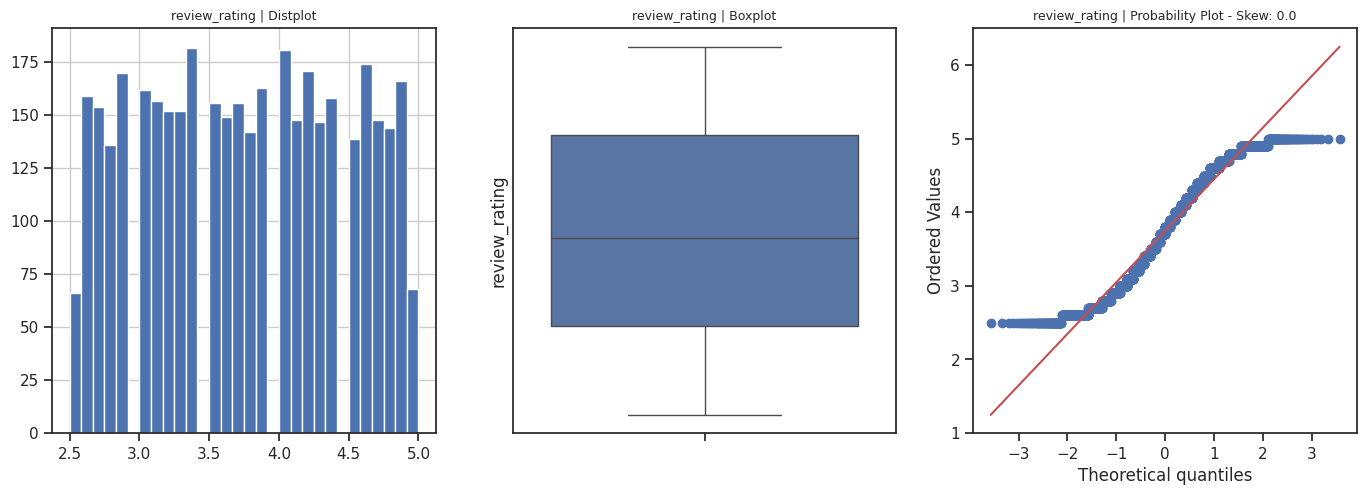

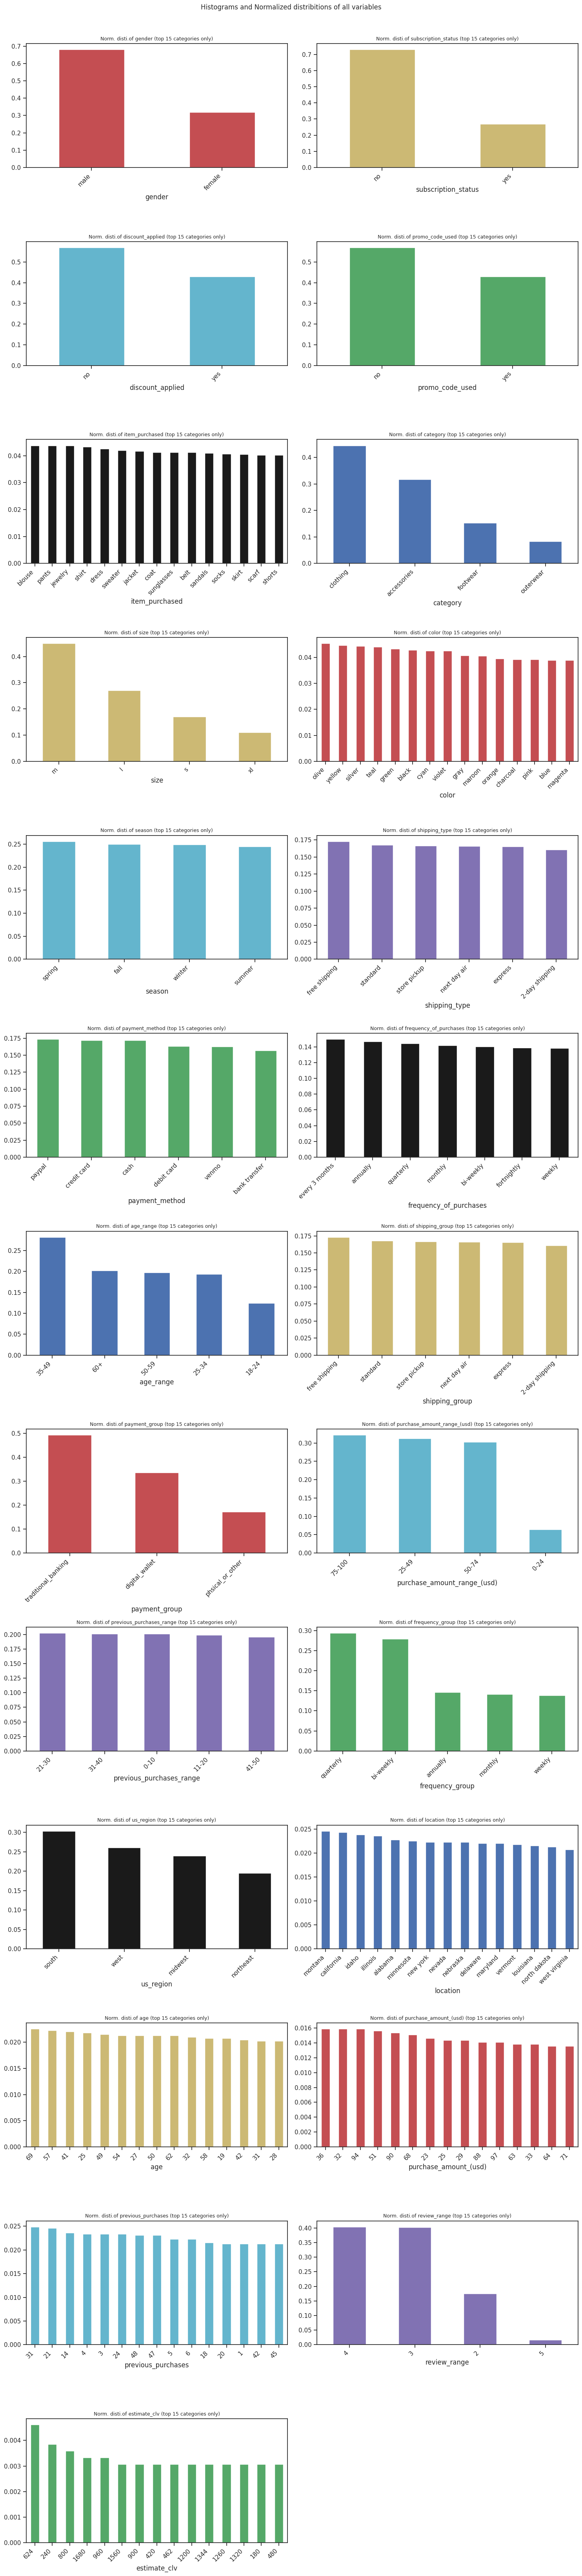

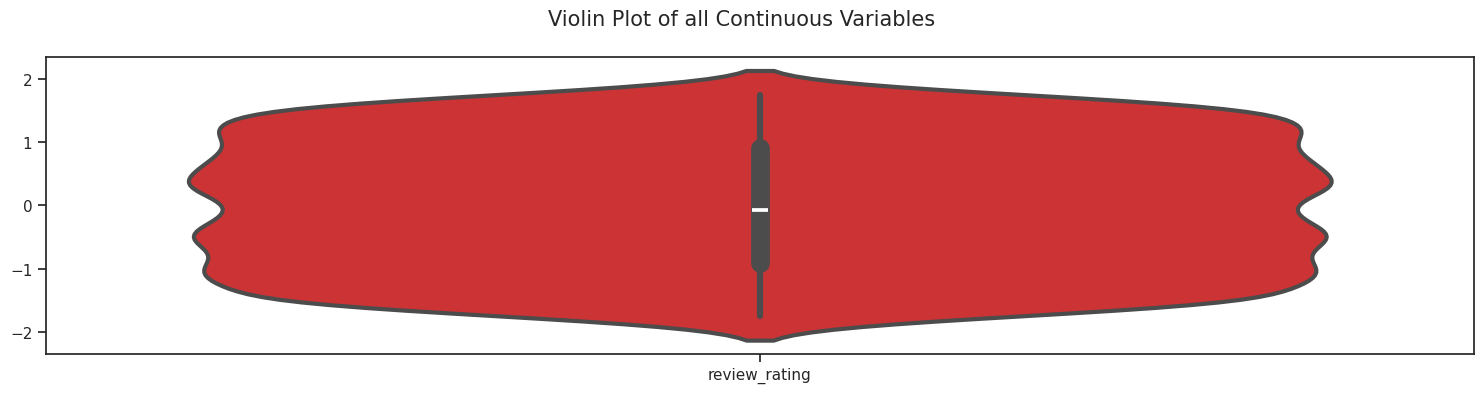

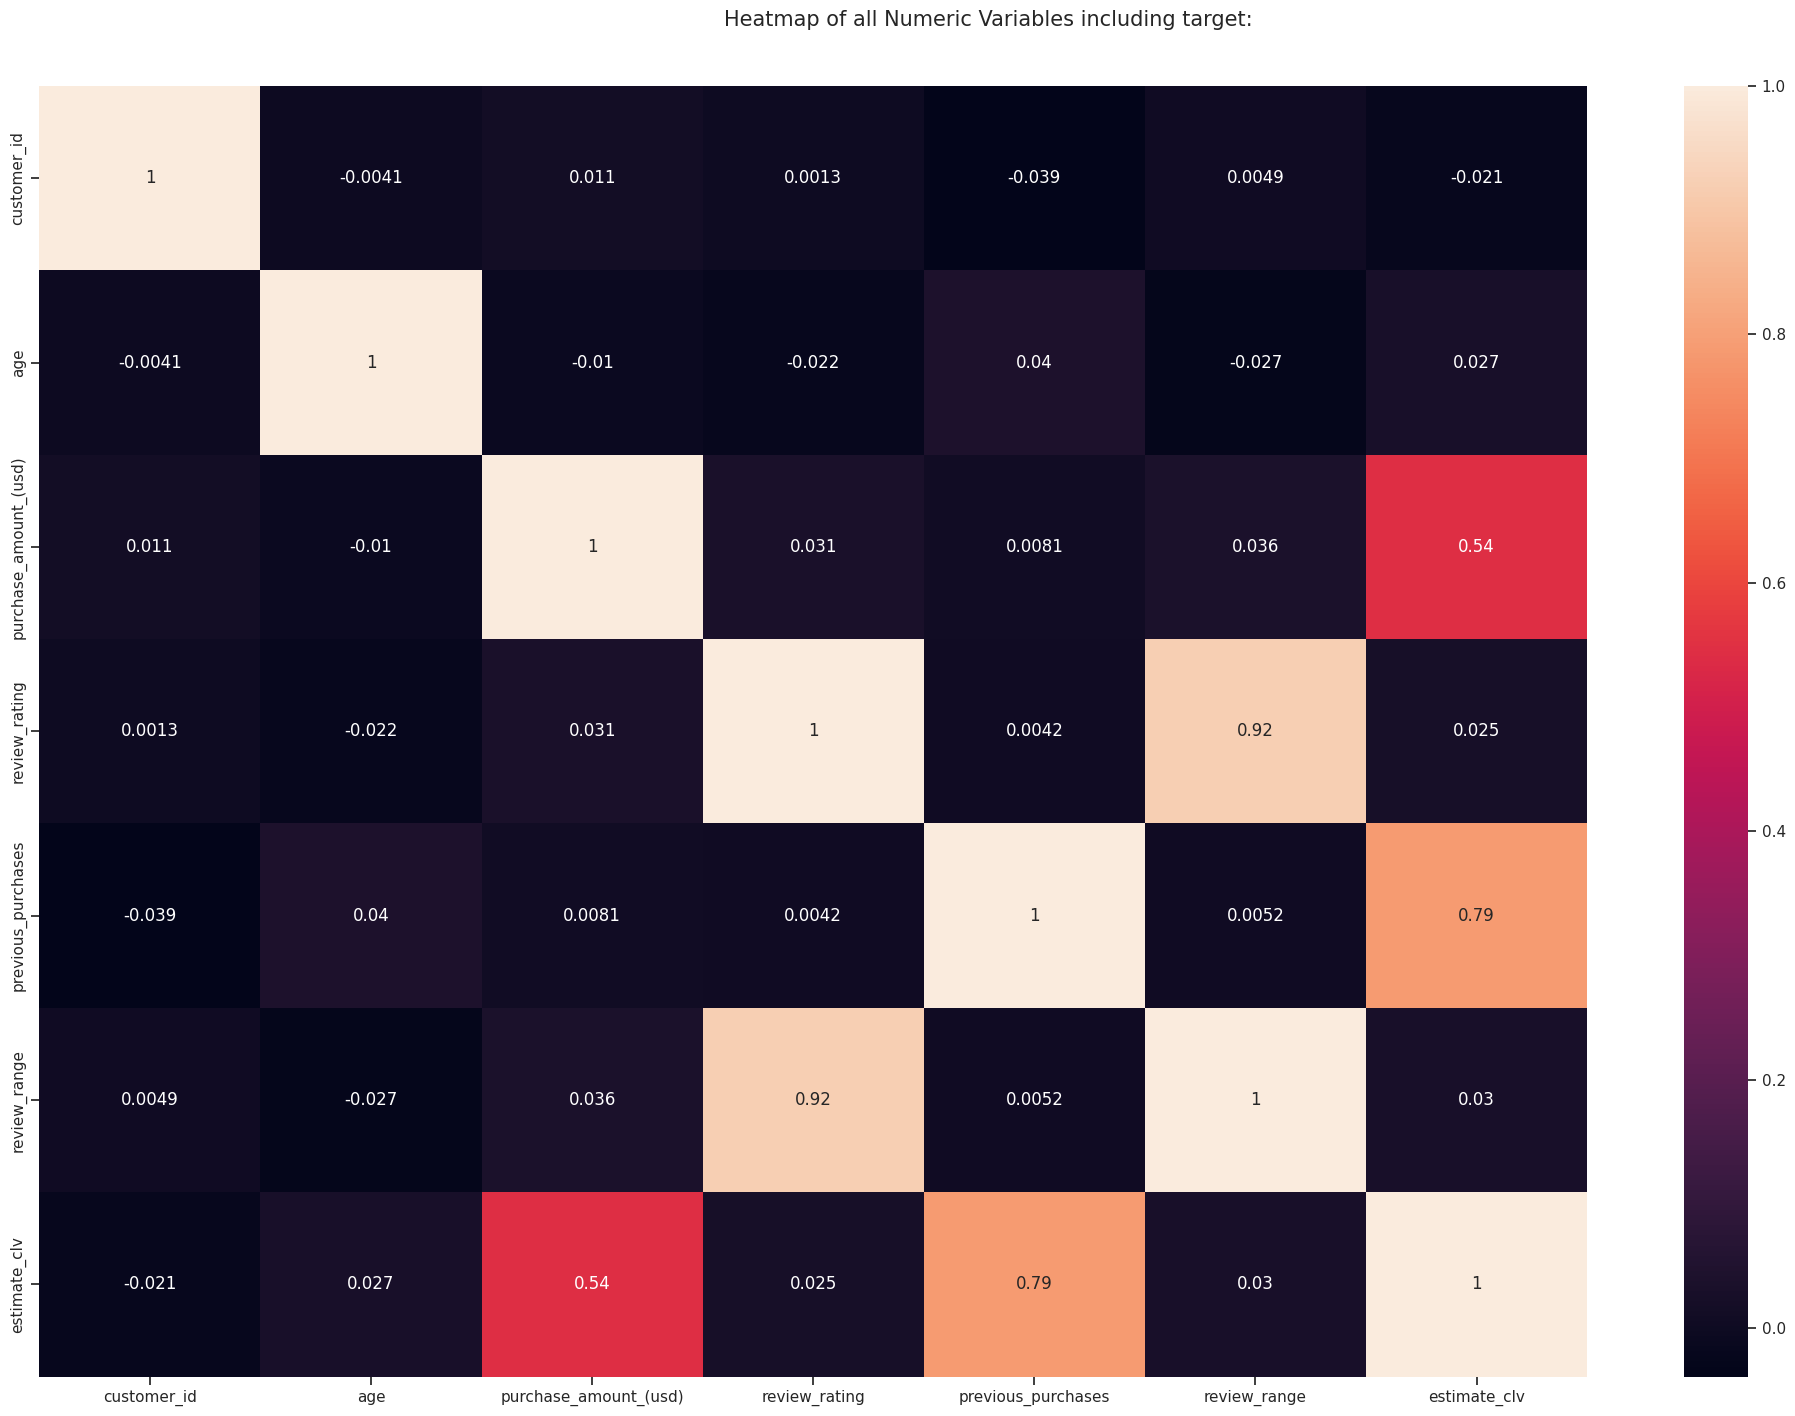

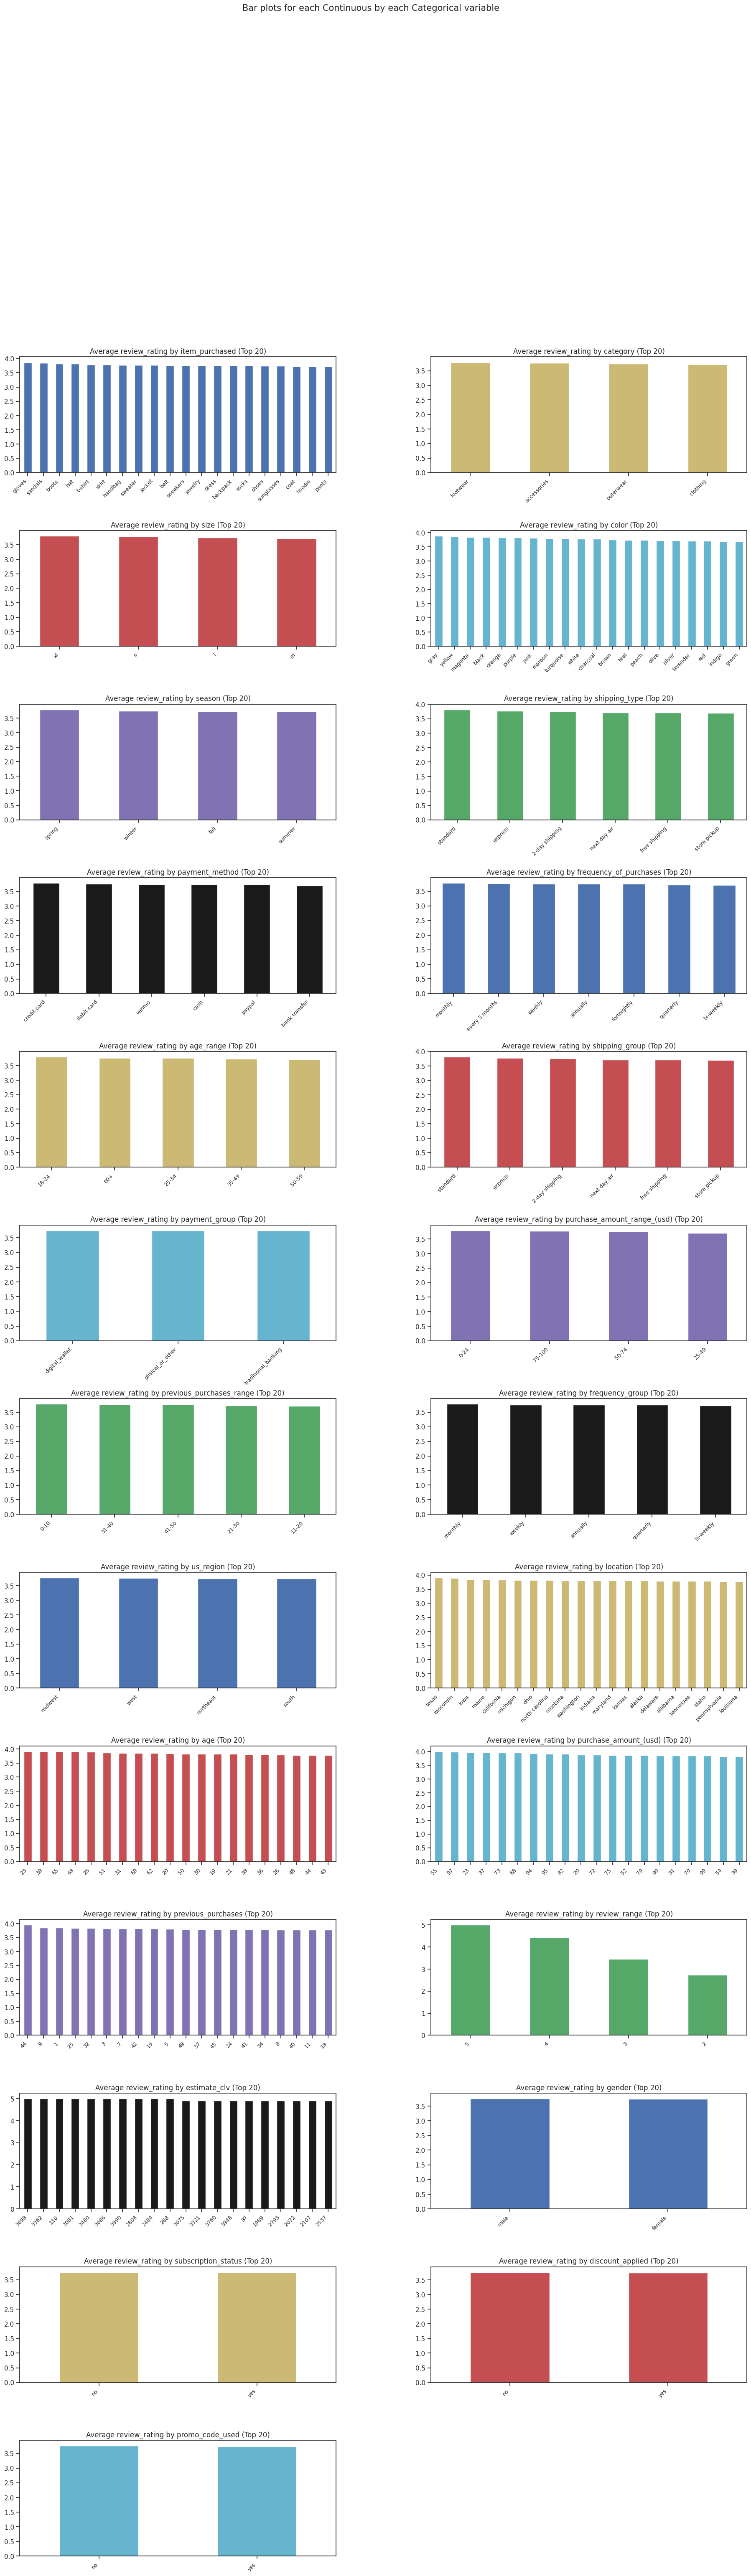

All Plots done
Time to run AutoViz = 10 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


,customer_id,age,gender,item_purchased,category,purchase_amount_(usd),location,size,color,season,review_rating,subscription_status,shipping_type,discount_applied,promo_code_used,previous_purchases,payment_method,frequency_of_purchases,age_range,review_range,shipping_group,shipping-group,payment_group,purchase_amount_range_(usd),previous_purchases_range,frequency_group,us_region,estimate_clv
0,1,55,male,blouse,clothing,53,kentucky,l,gray,winter,3.1,yes,express,yes,yes,14,venmo,fortnightly,50-59,3,express,fast,digital_wallet,50-74,11-20,bi-weekly,south,742
1,2,19,male,sweater,clothing,64,maine,l,maroon,winter,3.1,yes,express,yes,yes,2,cash,fortnightly,18-24,3,express,fast,phsical_or_other,50-74,0-10,bi-weekly,northeast,128
2,3,50,male,jeans,clothing,73,massachusetts,s,maroon,spring,3.1,yes,free shipping,yes,yes,23,credit card,weekly,50-59,3,free shipping,NaN,traditional_banking,50-74,21-30,weekly,northeast,1679
3,4,21,male,sandals,footwear,90,rhode island,m,maroon,spring,3.5,yes,next day air,yes,yes,49,paypal,weekly,18-24,3,next day air,fast,digital_wallet,75-100,41-50,weekly,northeast,4410
4,5,45,male,blouse,clothing,49,oregon,m,turquoise,spring,2.7,yes,free shipping,yes,yes,31,paypal,annually,35-49,2,free shipping,NaN,digital_wallet,25-49,31-40,annually,west,1519
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,female,hoodie,clothing,28,virginia,l,turquoise,summer,4.2,no,2-day shipping,no,no,32,venmo,weekly,35-49,4,2-day shipping,fast,digital_wallet,25-49,31-40,weekly,south,896
3896,3897,52,female,backpack,accessories,49,iowa,l,white,spring,4.5,no,store pickup,no,no,41,bank transfer,bi-weekly,50-59,4,store pickup,NaN,traditional_banking,25-49,41-50,bi-weekly,midwest,2009
3897,3898,46,female,belt,accessories,33,new jersey,l,green,spring,2.9,no,standard,no,no,24,venmo,quarterly,35-49,2,standard,NaN,digital_wallet,25-49,21-30,quarterly,northeast,792
3898,3899,44,female,shoes,footwear,77,minnesota,s,brown,summer,3.8,no,express,no,no,24,venmo,weekly,35-49,3,express,fast,digital_wallet,75-100,21-30,weekly,midwest,1848


In [ ]:
!pip install autoviz
from autoviz.AutoViz_Class import AutoViz_Class
%matplotlib inline
AV = AutoViz_Class()
AV.AutoViz(r"/content/customer_details.csv")

###

##Target Value

<Axes: xlabel='previous_purchases_range', ylabel='count'>

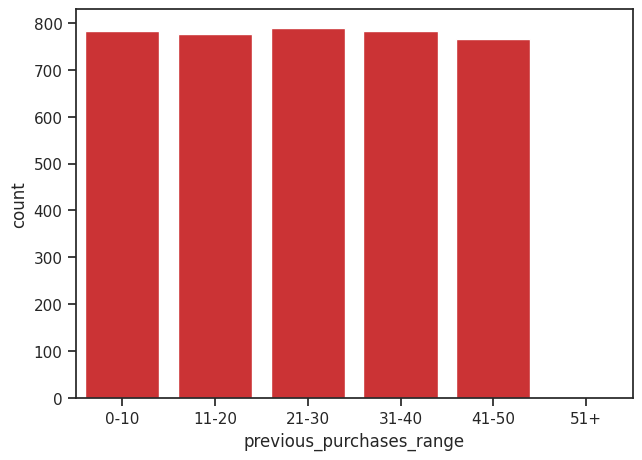

In [ ]:
sns.countplot(x='previous_purchases_range', data=df)

<Axes: xlabel='previous_purchases', ylabel='count'>

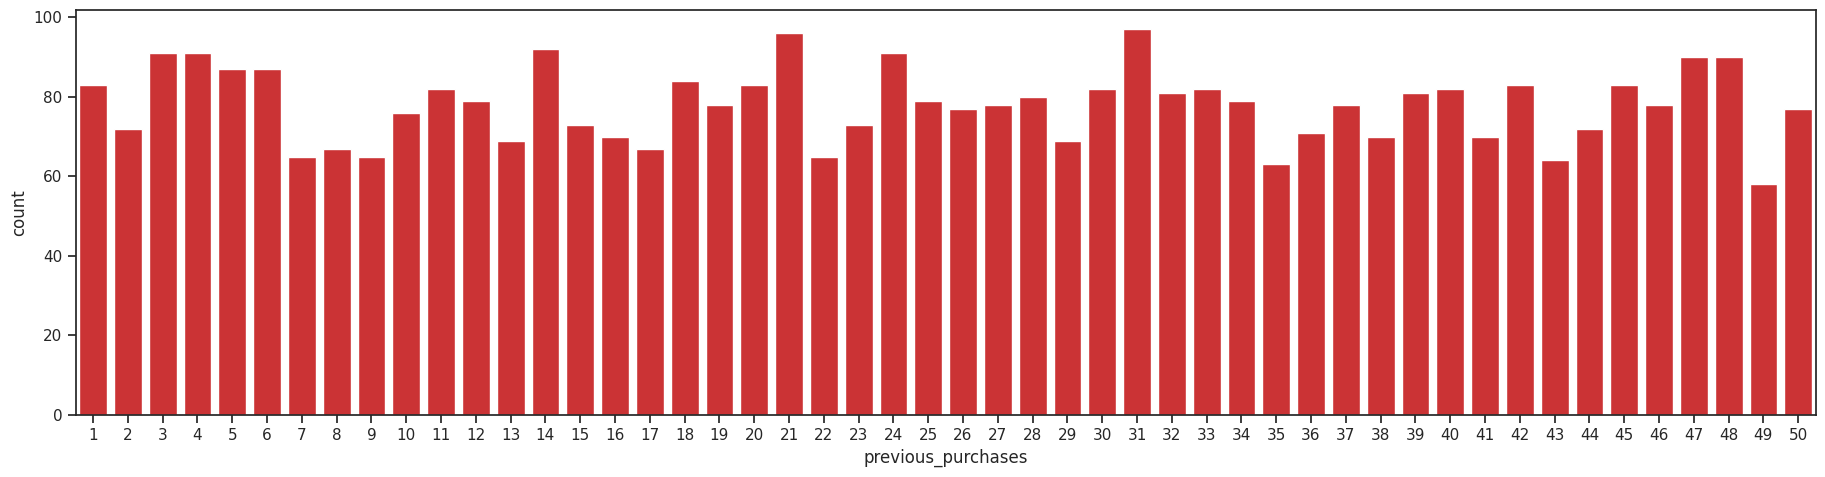

In [ ]:
fig, ax=plt.subplots(figsize=(20, 5))
sns.countplot(x='previous_purchases', data=df)

##Categorial Data

In [ ]:
#Changing relevant columns to category:

df.info()

full_dtype_mapping = {

    'size': 'category',
    'gender': 'category',
    'category': 'category',
    'color': 'category',
    'season': 'category',
    'shipping_group': 'category',
    'age_range': 'category',
    'payment_group': 'category',
    'frequency_group': 'category',
    'us_region': 'category',
    'review_range': 'category',
}

existing_category_cols = {
    col: dtype
    for col, dtype in full_dtype_mapping.items()
    if col in df.columns
}

df = df.astype(existing_category_cols)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 28 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   customer_id                  3900 non-null   int64   
 1   age                          3900 non-null   int64   
 2   gender                       3900 non-null   object  
 3   item_purchased               3900 non-null   object  
 4   category                     3900 non-null   object  
 5   purchase_amount_(usd)        3900 non-null   int64   
 6   location                     3900 non-null   object  
 7   size                         3900 non-null   object  
 8   color                        3900 non-null   object  
 9   season                       3900 non-null   object  
 10  review_rating                3900 non-null   float64 
 11  subscription_status          3900 non-null   object  
 12  shipping_type                3900 non-null   object  
 13  dis

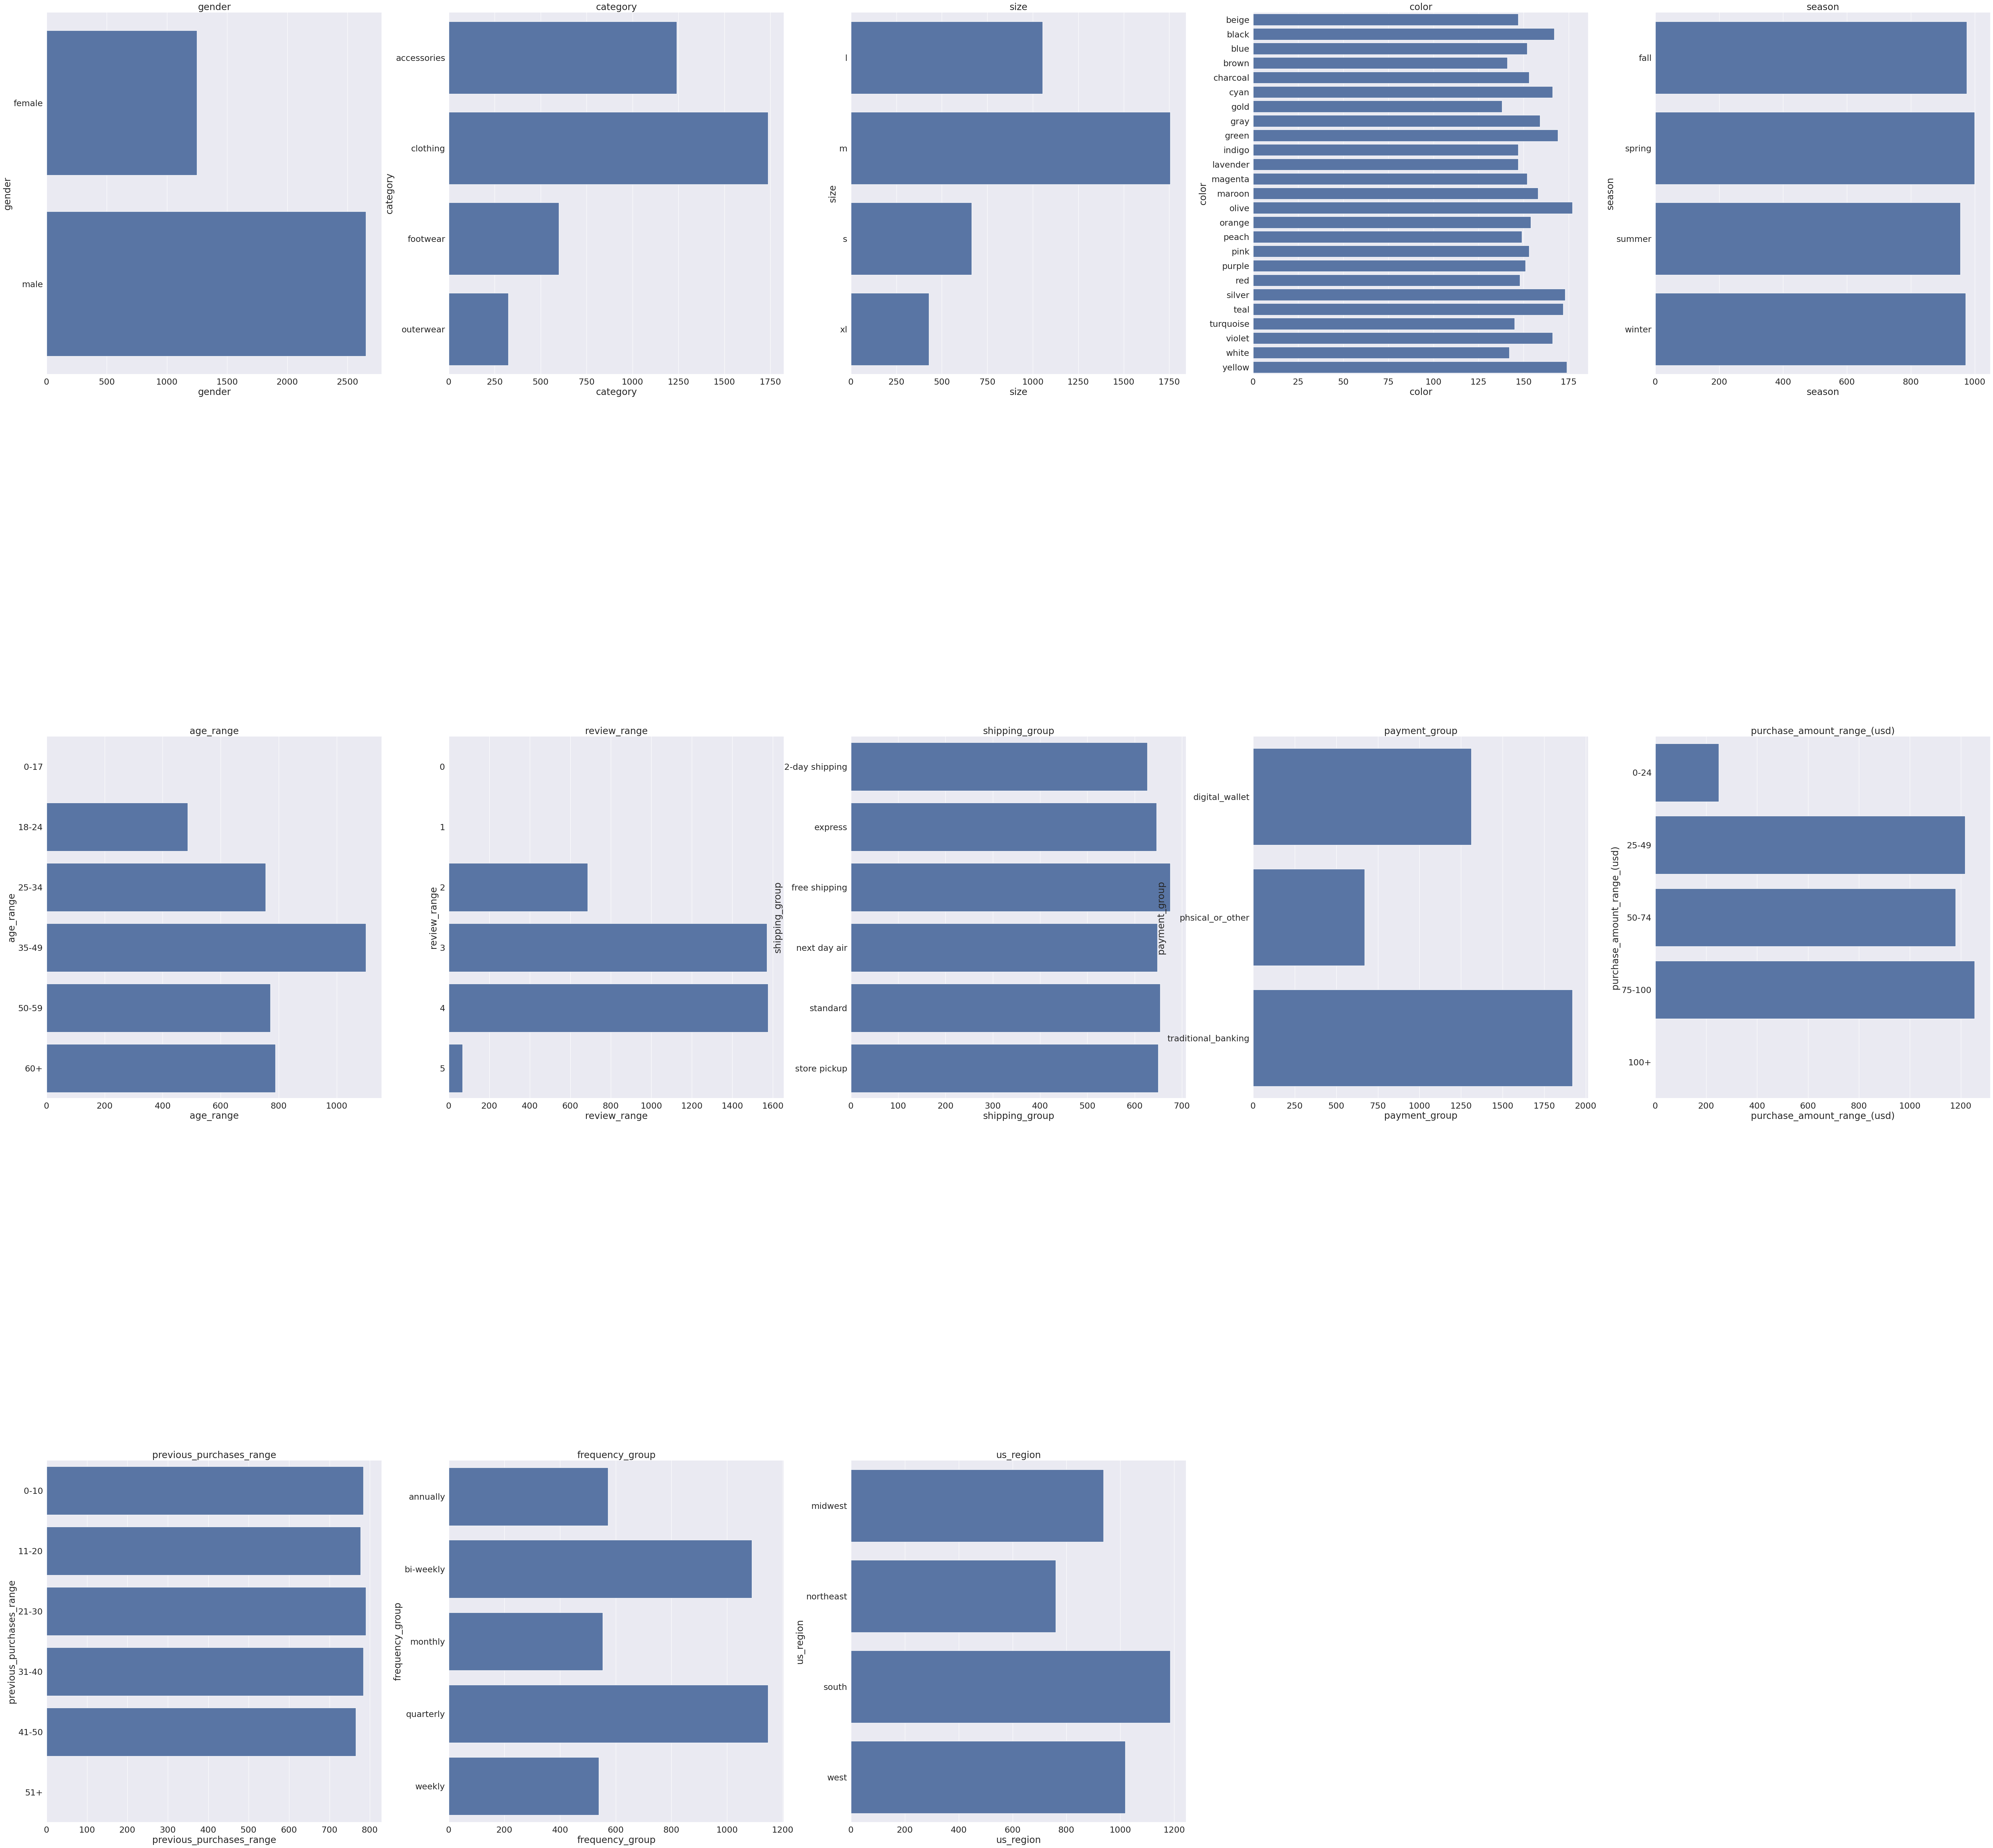

In [ ]:
#Spliting categories and checking plot

df_cat = df.select_dtypes(include=['category'])
plot_categorical = lambda col: sns.countplot(x=col, data=df_cat)

a=3 #number of rows
b=5 #number of columns
c=1 #plot counter

fig=plt.figure(figsize=(80, 80))
plt.subplots_adjust(hspace = 1)
sns.set(font_scale = 2)
for i in df_cat:

    plt.subplot(a,b,c)
    plt.title('{}'.format(i))
    plt.xlabel(i)
    sns.countplot(df_cat[i])
    c=c+1

plt.show()

##Continues (numeric), Histograms & Skewnwss

In [ ]:
#get all numeric data
df_num=df._get_numeric_data().dropna()
df_num.shape

(3900, 6)

In [ ]:
df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   customer_id            3900 non-null   int64  
 1   age                    3900 non-null   int64  
 2   purchase_amount_(usd)  3900 non-null   int64  
 3   review_rating          3900 non-null   float64
 4   previous_purchases     3900 non-null   int64  
 5   estimate_clv           3900 non-null   int64  
dtypes: float64(1), int64(5)
memory usage: 182.9 KB


In [ ]:
columns_to_convert = ['age', 'purchase_amount_(usd)', 'review_rating','previous_purchases', 'estimate_clv']
df_num = df[columns_to_convert].astype(float)

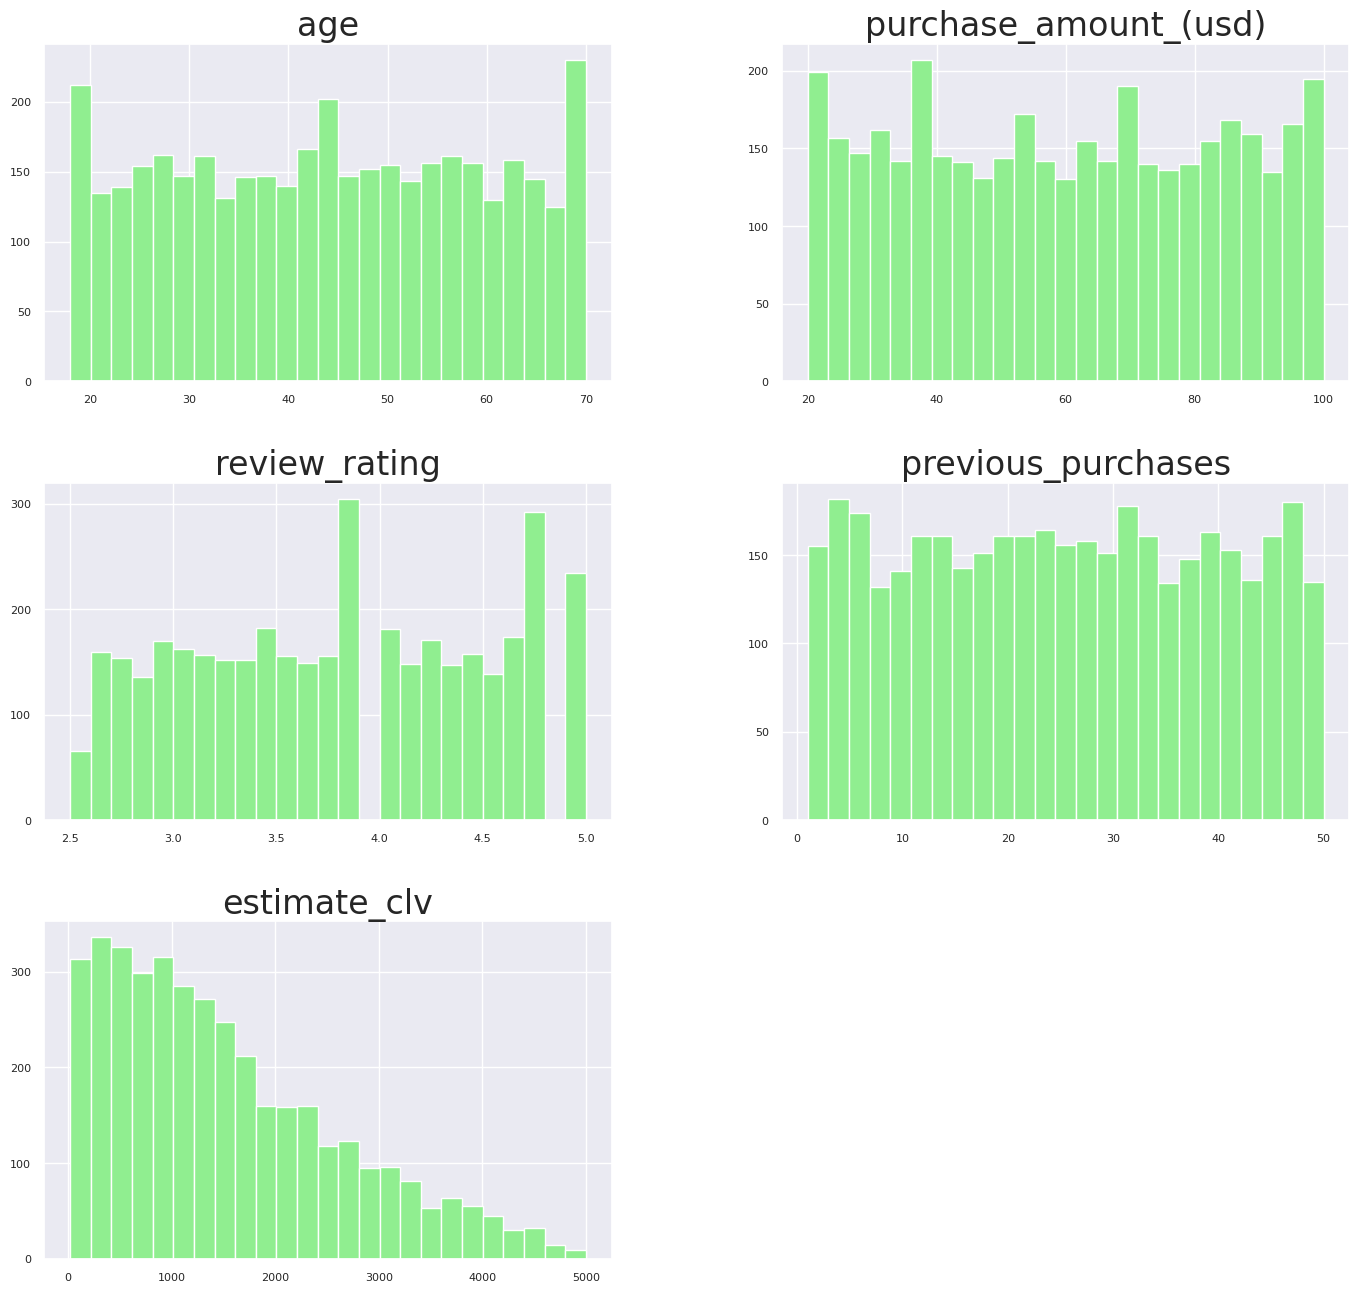

In [ ]:
df_num.hist(figsize=(15, 15), bins=25, xlabelsize=8, ylabelsize=8, color = "lightgreen");

In [ ]:
def highlight(cell_value):
    highlight = 'background-color: mediumspringgreen;'
    default = ''
    negative = 'background-color: hotpink;'
    if cell_value > 1:
        return highlight
    elif cell_value < -1:
        return negative
    #else
       # return default
pd.DataFrame(df_num.skew(),columns=['skewness']).sort_values(by='skewness', ascending=False).style.applymap(highlight)

,skewness
estimate_clv,0.825136
purchase_amount_(usd),0.012702
review_rating,0.004525
previous_purchases,0.003121
age,-0.006380


No Skewness in the DF

##Correlation

In [ ]:
# Select only numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=np.number)

# Calculate and display the correlation matrix
display(numeric_df.corr())

,customer_id,age,purchase_amount_(usd),review_rating,previous_purchases,estimate_clv
customer_id,1.000000,-0.004079,0.011048,0.001343,-0.039159,-0.021320
age,-0.004079,1.000000,-0.010424,-0.021949,0.040445,0.026880
purchase_amount_(usd),0.011048,-0.010424,1.000000,0.030776,0.008063,0.543773
review_rating,0.001343,-0.021949,0.030776,1.000000,0.004229,0.025147
previous_purchases,-0.039159,0.040445,0.008063,0.004229,1.000000,0.785111
estimate_clv,-0.021320,0.026880,0.543773,0.025147,0.785111,1.000000


<Axes: >

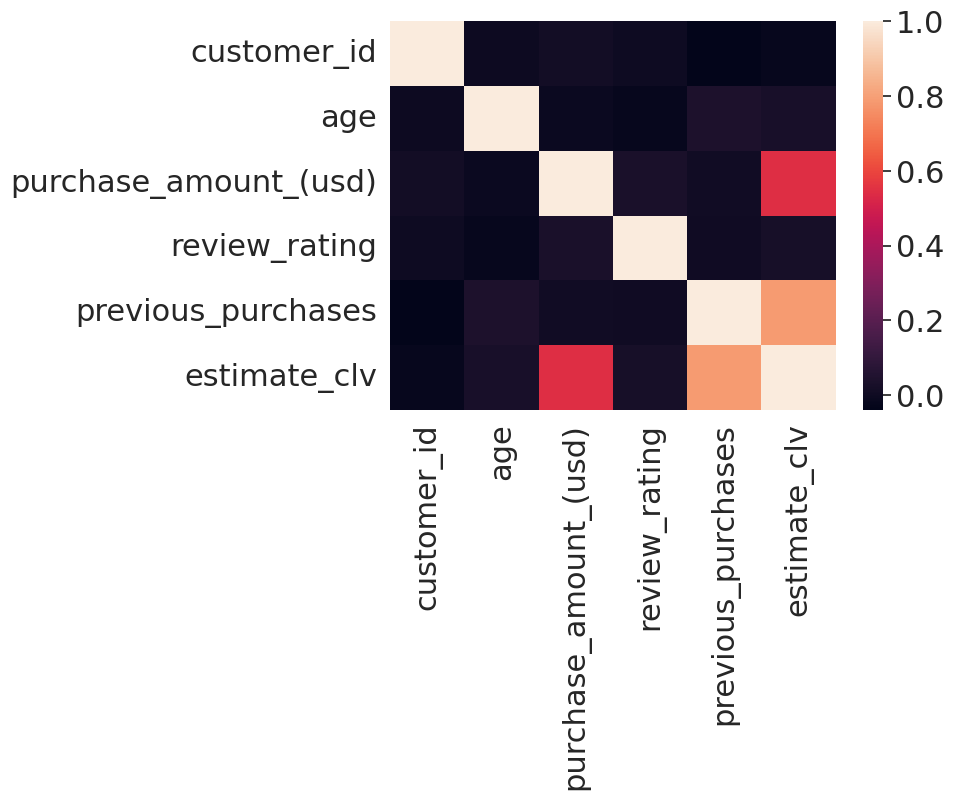

In [ ]:
sns.heatmap(numeric_df.corr())

we see we do not have a correnlation, only in:

purchase amount >< estimate clv

and

previous purchases >< estimate clv

In [ ]:
numeric_df.corr(method='spearman')

,customer_id,age,purchase_amount_(usd),review_rating,previous_purchases,estimate_clv
customer_id,1.000000,-0.004190,0.011185,0.001193,-0.039224,-0.026150
age,-0.004190,1.000000,-0.010445,-0.021969,0.040513,0.026934
purchase_amount_(usd),0.011185,-0.010445,1.000000,0.030380,0.008315,0.507215
review_rating,0.001193,-0.021969,0.030380,1.000000,0.004438,0.016251
previous_purchases,-0.039224,0.040513,0.008315,0.004438,1.000000,0.825990
estimate_clv,-0.026150,0.026934,0.507215,0.016251,0.825990,1.000000


##Anova

In [ ]:
#F-statistic = Variance Between the groups/Variance within the groups

# Set the random seed for reproducibility
np.random.seed(42)
group1 = np.random.normal(loc=50, scale=5, size=100)
group2 = np.random.normal(loc=60, scale=5, size=100)
group3 = np.random.normal(loc=70, scale=5, size=100)

# performe ANOVA
f_statistic, p_value = stats.f_oneway(group1, group2, group3)

print(f"F-statistic: {f_statistic}")
print(f"p-value: {p_value}")

if p_value < 0.05:
    print("There is a significant difference between the group means")
else:
    print("No significant difference between the group means")

F-statistic: 447.9690478578081
p-value: 2.1211599909886115e-90
There is a significant difference between the group means


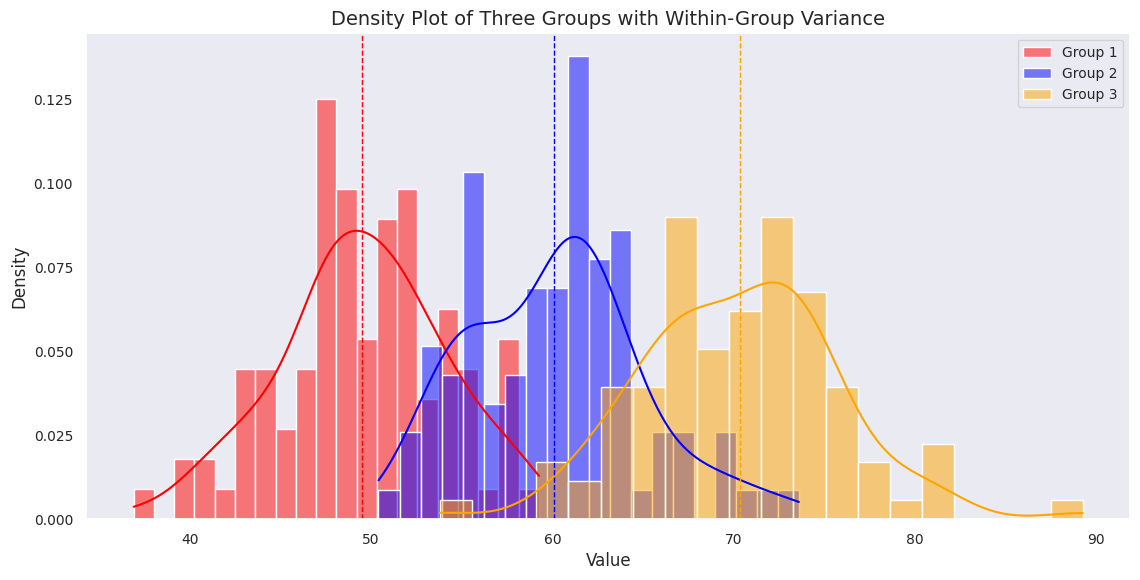

In [ ]:
# Create a density plot
plt.figure(figsize=(12, 6))

# Plot the density of each group
sns.histplot(group1, kde=True, label='Group 1', color='red', bins=20, stat="density", alpha=0.5)
sns.histplot(group2, kde=True, label='Group 2', color='blue', bins=20, stat="density", alpha=0.5)
sns.histplot(group3, kde=True, label='Group 3', color='orange', bins=20, stat="density", alpha=0.5)

# Add lines for the means of each group
plt.axvline(np.mean(group1), color='red', linestyle='--', linewidth=1)
plt.axvline(np.mean(group2), color='blue', linestyle='--', linewidth=1)
plt.axvline(np.mean(group3), color='orange', linestyle='--', linewidth=1)

# Set titles and labels with smaller font size
plt.title('Density Plot of Three Groups with Within-Group Variance', fontsize=14)
plt.xlabel('Value', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend(fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(False)

# Show the plot
plt.show()

##CHI-Square

In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency



In [ ]:
df_cat.columns

Index(['gender', 'category', 'size', 'color', 'season', 'age_range',
       'review_range', 'shipping_group', 'payment_group',
       'purchase_amount_range_(usd)', 'previous_purchases_range',
       'frequency_group', 'us_region'],
      dtype='object')

In [ ]:
from scipy.stats import chi2_contingency

# Select specified columns
selected_columns = ['gender', 'category', 'size', 'color', 'season', 'age_range',
       'review_range', 'shipping_group', 'payment_group',
       'purchase_amount_range_(usd)', 'previous_purchases_range',
       'frequency_group', 'us_region']
df_chi = df[selected_columns]
df_chi=df_chi.dropna()

In [ ]:
# Select two categorical columns for Chi-Square testing
contingency_table = pd.crosstab(df_chi['frequency_group'], df_chi['gender'])
#Select two categorical columns for Chi-Square testing
# Perform the Chi-Square test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

# Print results
print("\nChi-Square Test Results:")
print(f"Chi-Square Statistic: {chi2_stat:.4f}")
print(f"P-Value: {p_value:.4f}")
print(f"Degrees of Freedom: {dof}")


Chi-Square Test Results:
Chi-Square Statistic: 1.1776
P-Value: 0.8818
Degrees of Freedom: 4


As per the Chi-square, we havn't found evidence to suggest that the categories of one variable influence the categories of the other

#Data Cleansing

##Outlier Detection

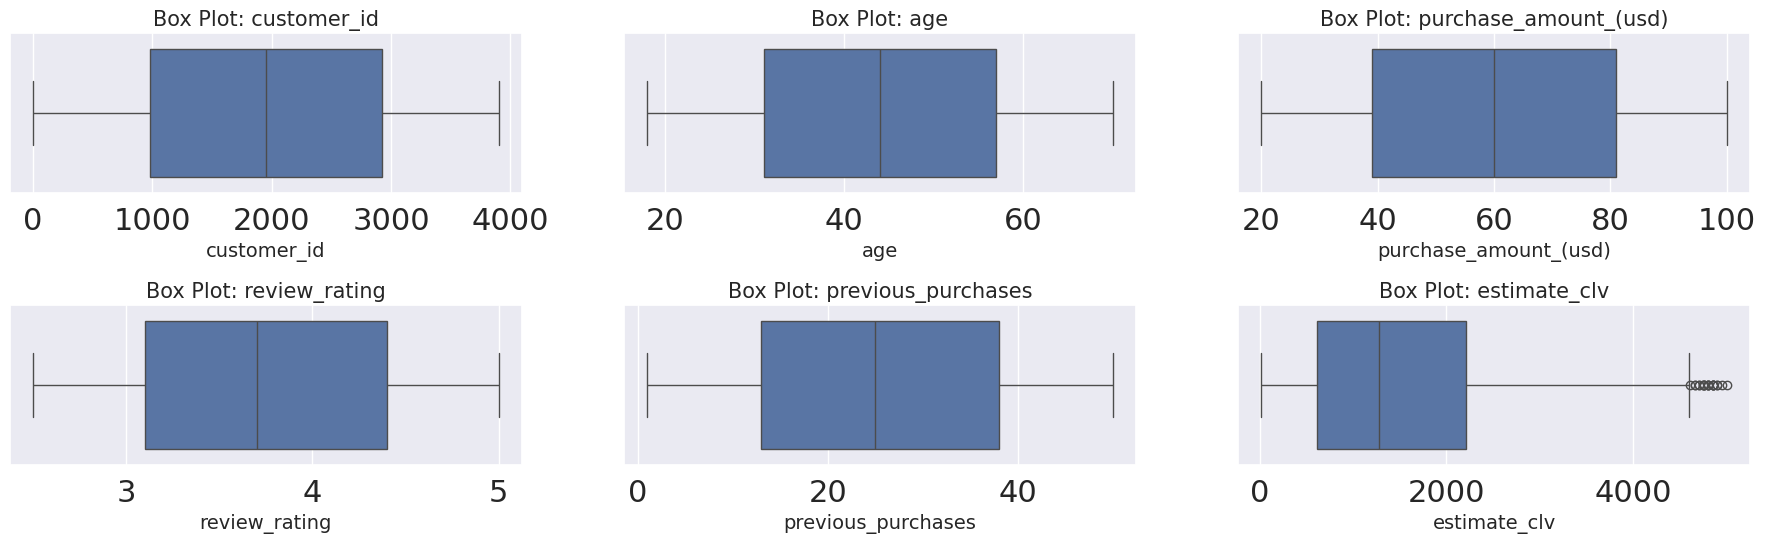

In [ ]:
#Continues Numeric Columns
## Using box (Wiskers) plot
plt.figure(figsize=(20,200))

def outliers_boxplot(df):
    for i, col in enumerate(df.columns):

            ax = plt.subplot(60, 3, i+1)
            sns.boxplot(data=df, x=col, ax=ax)
            plt.subplots_adjust(hspace = 0.7)
            plt.title('Box Plot: {}'.format(col), fontsize=15)
            plt.xlabel('{}'.format(col), fontsize=14)

outliers_boxplot(numeric_df)

##Z-Score

In [ ]:
# Importing scipy stats and zscore libreries
from scipy.stats import zscore

In [ ]:
#Results using z-score
z = np.abs(stats.zscore(df['estimate_clv']))
print(z)

[0.6947323  1.24451747 0.14427212 ... 0.64996152 0.29559735 1.03431522]


<Axes: xlabel='None', ylabel='estimate_clv'>

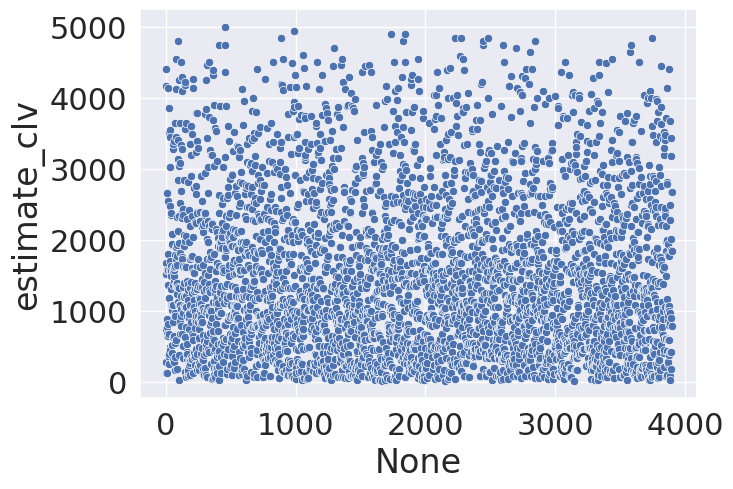

In [ ]:
###  using scatterplots
sns.scatterplot(x=df.index,y=df['estimate_clv'])

Data is sure clean enough with no outliers

##Checking again for missing Values

In [ ]:
df.isnull().head(10)

,customer_id,age,gender,item_purchased,category,purchase_amount_(usd),location,size,color,season,review_rating,subscription_status,shipping_type,discount_applied,promo_code_used,previous_purchases,payment_method,frequency_of_purchases,age_range,review_range,shipping_group,shipping-group,payment_group,purchase_amount_range_(usd),previous_purchases_range,frequency_group,us_region,estimate_clv
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 28 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   customer_id                  3900 non-null   int64   
 1   age                          3900 non-null   int64   
 2   gender                       3900 non-null   category
 3   item_purchased               3900 non-null   object  
 4   category                     3900 non-null   category
 5   purchase_amount_(usd)        3900 non-null   int64   
 6   location                     3900 non-null   object  
 7   size                         3900 non-null   category
 8   color                        3900 non-null   category
 9   season                       3900 non-null   category
 10  review_rating                3900 non-null   float64 
 11  subscription_status          3900 non-null   object  
 12  shipping_type                3900 non-null   object  
 13  dis

In [ ]:
df.isnull().sum()

,0
customer_id,0
age,0
gender,0
item_purchased,0
category,0
purchase_amount_(usd),0
location,0
size,0
color,0
season,0


No Missing Values

#Feature Engineering & One-Hot Encoding

In [ ]:
df.head(5)

,customer_id,age,gender,item_purchased,category,purchase_amount_(usd),location,size,color,season,review_rating,subscription_status,shipping_type,discount_applied,promo_code_used,previous_purchases,payment_method,frequency_of_purchases,age_range,review_range,shipping_group,shipping-group,payment_group,purchase_amount_range_(usd),previous_purchases_range,frequency_group,us_region,estimate_clv
0,1,55,male,blouse,clothing,53,kentucky,l,gray,winter,3.1,yes,express,yes,yes,14,venmo,fortnightly,50-59,3,express,fast,digital_wallet,50-74,11-20,bi-weekly,south,742
1,2,19,male,sweater,clothing,64,maine,l,maroon,winter,3.1,yes,express,yes,yes,2,cash,fortnightly,18-24,3,express,fast,phsical_or_other,50-74,0-10,bi-weekly,northeast,128
2,3,50,male,jeans,clothing,73,massachusetts,s,maroon,spring,3.1,yes,free shipping,yes,yes,23,credit card,weekly,50-59,3,free shipping,NaN,traditional_banking,50-74,21-30,weekly,northeast,1679
3,4,21,male,sandals,footwear,90,rhode island,m,maroon,spring,3.5,yes,next day air,yes,yes,49,paypal,weekly,18-24,3,next day air,fast,digital_wallet,75-100,41-50,weekly,northeast,4410
4,5,45,male,blouse,clothing,49,oregon,m,turquoise,spring,2.7,yes,free shipping,yes,yes,31,paypal,annually,35-49,2,free shipping,NaN,digital_wallet,25-49,31-40,annually,west,1519


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 28 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   customer_id                  3900 non-null   int64   
 1   age                          3900 non-null   int64   
 2   gender                       3900 non-null   category
 3   item_purchased               3900 non-null   object  
 4   category                     3900 non-null   category
 5   purchase_amount_(usd)        3900 non-null   int64   
 6   location                     3900 non-null   object  
 7   size                         3900 non-null   category
 8   color                        3900 non-null   category
 9   season                       3900 non-null   category
 10  review_rating                3900 non-null   float64 
 11  subscription_status          3900 non-null   object  
 12  shipping_type                3900 non-null   object  
 13  dis

Ordinal Mapping basic premise: of the creteria's is more tight\ high, it gets more points

In [ ]:
#making ordinal mapping:
frequency_map_ordinal = {
    'annually': 1,
    'quarterly': 2,
    'monthly': 3,
    'bi-weekly': 4,
    'weekly': 5
}

df['frequency_rank'] = df['frequency_of_purchases'].str.lower().map(frequency_map_ordinal)

#size mapping from small to big:
size_mapping = {
    'xxs': 1, #added for future and saftey porpose
    'xs': 2, #added for future and saftey porpose
    's': 3,
    'm': 4,
    'l': 5,
    'xl': 6,
    'xxl': 7, #added for future and saftey porpose
}

df['size_encoded'] = df['size'].map(size_mapping)


#changing columns to dummies\ binars: Gender, Sub Stat, Dis App, Promo Code: this is feature engineering or one-hot encoding

#Gender
df['gender_bin'] = df['gender'].map({'male':1, 'female':0})

#Binary encoding for 'yes' and 'no' columns:

binary_cols = ['subscription_status', 'discount_applied', 'promo_code_used']
for col in binary_cols:
    df[col + '_bin'] = df[col].map({'yes': 1, 'no': 0})

#Subscription Status - second options
#df['subscription.status.binar'] = df['subscription.status'].map({'yes':1, 'no':0})
#Discount Applied
#df['discount.applied.binar'] = df['discount.applied'].map({'yes':1, 'no':0})
#Promo Code Used
#df['promo.code.used.binar'] = df['promo.code.used'].map({'yes':1, 'no':0})


ohe_cols =[
    'category',
    'us_region',
    'season',
    'payment_method',
    'shipping_type',
    'color'
]

df_encoded = pd.get_dummies(df, columns=ohe_cols, drop_first=True, prefix=ohe_cols)

df_encoded.head(5)

,customer_id,age,gender,item_purchased,purchase_amount_(usd),location,size,review_rating,subscription_status,discount_applied,promo_code_used,previous_purchases,frequency_of_purchases,age_range,review_range,shipping_group,shipping-group,payment_group,purchase_amount_range_(usd),previous_purchases_range,frequency_group,estimate_clv,frequency_rank,size_encoded,gender_bin,subscription_status_bin,discount_applied_bin,promo_code_used_bin,category_clothing,category_footwear,category_outerwear,us_region_northeast,us_region_south,us_region_west,season_spring,season_summer,season_winter,payment_method_cash,payment_method_credit card,payment_method_debit card,payment_method_paypal,payment_method_venmo,shipping_type_express,shipping_type_free shipping,shipping_type_next day air,shipping_type_standard,shipping_type_store pickup,color_black,color_blue,color_brown,color_charcoal,color_cyan,color_gold,color_gray,color_green,color_indigo,color_lavender,color_magenta,color_maroon,color_olive,color_orange,color_peach,color_pink,color_purple,color_red,color_silver,color_teal,color_turquoise,color_violet,color_white,color_yellow
0,1,55,male,blouse,53,kentucky,l,3.1,yes,yes,yes,14,fortnightly,50-59,3,express,fast,digital_wallet,50-74,11-20,bi-weekly,742,NaN,5,1,1,1,1,True,False,False,False,True,False,False,False,True,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,2,19,male,sweater,64,maine,l,3.1,yes,yes,yes,2,fortnightly,18-24,3,express,fast,phsical_or_other,50-74,0-10,bi-weekly,128,NaN,5,1,1,1,1,True,False,False,True,False,False,False,False,True,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
2,3,50,male,jeans,73,massachusetts,s,3.1,yes,yes,yes,23,weekly,50-59,3,free shipping,NaN,traditional_banking,50-74,21-30,weekly,1679,5.0,3,1,1,1,1,True,False,False,True,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
3,4,21,male,sandals,90,rhode island,m,3.5,yes,yes,yes,49,weekly,18-24,3,next day air,fast,digital_wallet,75-100,41-50,weekly,4410,5.0,4,1,1,1,1,False,True,False,True,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
4,5,45,male,blouse,49,oregon,m,2.7,yes,yes,yes,31,annually,35-49,2,free shipping,NaN,digital_wallet,25-49,31-40,annually,1519,1.0,4,1,1,1,1,True,False,False,False,False,True,True,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False


In [ ]:
df_encoded.info() #df after encoded and mapping.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 71 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   customer_id                  3900 non-null   int64   
 1   age                          3900 non-null   int64   
 2   gender                       3900 non-null   category
 3   item_purchased               3900 non-null   object  
 4   purchase_amount_(usd)        3900 non-null   int64   
 5   location                     3900 non-null   object  
 6   size                         3900 non-null   category
 7   review_rating                3900 non-null   float64 
 8   subscription_status          3900 non-null   object  
 9   discount_applied             3900 non-null   object  
 10  promo_code_used              3900 non-null   object  
 11  previous_purchases           3900 non-null   int64   
 12  frequency_of_purchases       3900 non-null   object  
 13  age

In [ ]:
df_final = df_encoded

#Feature Selection

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, Ridge
from sklearn.svm import LinearSVR
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from xgboost import XGBRegressor

# 1. Target feature:
TARGET = 'previous_purchases'

# Columns to drop:
cols_to_drop = [
    'customer_id', #not relevant
    TARGET, # Target must be dropped from X
    'item_purchased',
    'location',
    'size',
    'gender',
    'subscription_status',
    'discount_applied',
    'promo_code_used',
    'frequency_of_purchases',
    'shipping-group', # Column with Nulls/Duplicate

    # categorical columns (encoded what's necessary)
    'age_range', 'review_range', 'shipping_group', 'payment_group',
    'purchase_amount_range_(usd)', 'previous_purchases_range', 'frequency_group'
]

# Ensure the columns exist before trying to drop them
cols_to_drop_final = [col for col in cols_to_drop if col in df_final.columns]

# Create X (Features) and y (Target)
X_raw = df_final.drop(columns=cols_to_drop_final, errors='ignore').copy()
y = df_final[TARGET]

# 2. Convert Boolean and Category types to suitable numeric types (int/float)
# Convert bool columns (OHE outputs) to int (0 or 1)
bool_cols = X_raw.select_dtypes(include='bool').columns
X_raw[bool_cols] = X_raw[bool_cols].astype(int)

# Convert category/object columns that may have slipped through (should be very few)
for col in X_raw.select_dtypes(include=['category', 'object']).columns:
    X_raw = X_raw.drop(columns=[col])


# 3. Standardization (Scaling)
numerical_cols = X_raw.select_dtypes(include=['int64', 'float64']).columns.tolist()

cols_to_exclude_from_scaling = [col for col in numerical_cols if 'bin' in col or 'rank' in col or 'encoded' in col]

cols_to_scale = [col for col in numerical_cols if col not in cols_to_exclude_from_scaling]

scaler = StandardScaler()
X = X_raw.copy()
X[cols_to_scale] = scaler.fit_transform(X[cols_to_scale])

# Handle NaNs created during frequency_rank mapping (fill with median/mean or 0)
X['frequency_rank'] = X['frequency_rank'].fillna(X['frequency_rank'].median())


# 4. Feature Selection Execution
# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Fit Models ---
# Regression models for feature selection (using the full dataset X)
lasso = Lasso(alpha=0.01, random_state=42).fit(X, y)
ridge = Ridge(alpha=0.01, random_state=42).fit(X, y)
svm = LinearSVR(C=0.1, loss="epsilon_insensitive", max_iter=5000, random_state=42).fit(X, y)
gb = GradientBoostingRegressor(random_state=42).fit(X, y)
rf = RandomForestRegressor(random_state=42).fit(X, y)
xgb = XGBRegressor(random_state=42, use_label_encoder=False, eval_metric='rmse').fit(X, y)

# --- Create Selection Summary ---
# Get Selection Masks
lasso_selected = (np.abs(lasso.coef_) > 1e-6).astype(int)
ridge_selected = (np.abs(ridge.coef_) > 1e-6).astype(int)
svm_selected = (np.abs(svm.coef_) > 1e-6).astype(int)

selection_df_final = pd.DataFrame({'Feature': X.columns})
selection_df_final['Lasso'] = lasso_selected
selection_df_final['Ridge'] = ridge_selected
selection_df_final['SVR'] = svm_selected
selection_df_final['GBoost'] = (gb.feature_importances_ > 1e-6).astype(int)
selection_df_final['RForest'] = (rf.feature_importances_ > 1e-6).astype(int)
selection_df_final['XGBoost'] = (xgb.feature_importances_ > 1e-6).astype(int)

# Sum the votes
selection_df_final['Sum'] = selection_df_final[['Lasso', 'Ridge', 'SVR', 'GBoost', 'RForest', 'XGBoost']].sum(axis=1)

print("\n--- Feature Selection Summary (Top 30 Predictors) ---")
print(selection_df_final.sort_values(by='Sum', ascending=False).head(30))


--- Feature Selection Summary (Top 30 Predictors) ---
             Feature             Lasso  Ridge  SVR  GBoost  RForest  XGBoost  \
0                           age    1      1     1      1       1        1      
1         purchase_amount_(usd)    1      1     1      1       1        1      
3                  estimate_clv    1      1     1      1       1        1      
2                 review_rating    1      1     1      0       1        1      
5       subscription_status_bin    1      1     1      0       1        1      
6          discount_applied_bin    1      1     1      0       1        1      
8             category_clothing    1      1     1      0       1        1      
10           category_outerwear    1      1     1      0       1        1      
9             category_footwear    1      1     1      0       1        1      
12              us_region_south    1      1     1      0       1        1      
11          us_region_northeast    1      1     1      0       1 

# Model Selection and fine tuning

##Model Selection CV

In [ ]:
from sklearn import metrics
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
import xgboost

# --- metrics function ---
def regressionMetrics(y, yhat):
    res = {
        'MSE': metrics.mean_squared_error(y, yhat),
        'RMSE': np.sqrt(metrics.mean_squared_error(y, yhat)),
        'MAE': metrics.mean_absolute_error(y, yhat),
        # 'RMSLE': np.sqrt(metrics.mean_squared_log_error(y, yhat)), # Removed due to ValueError
        'R2': metrics.r2_score(y, yhat)
    }
    return res

# --- models dictionary ---
models = {
    "LinearRegression": LinearRegression(),
    "DecisionTreeRegressor": DecisionTreeRegressor(),
    "RandomForestRegressor": RandomForestRegressor(),
    "AdaBoostRegressor": AdaBoostRegressor(),
    "GradientBoostingRegressor": GradientBoostingRegressor(),
    "SVR": SVR(),
    "XGBRegressor": xgboost.XGBRegressor(objective="reg:squarederror")
}

# --- train, predict, and evaluate on DEV set ---
results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_test_pred = model.predict(X_test)
    m = regressionMetrics(y_test, y_test_pred)
    results.append({"Model": name, **m})

# --- results table ---
df_results = pd.DataFrame(results)
df_results

,Model,MSE,RMSE,MAE,R2
0,LinearRegression,28.946355,5.380182,3.969007,0.855352
1,DecisionTreeRegressor,1.219231,1.104188,0.701282,0.993907
2,RandomForestRegressor,0.275894,0.525256,0.340462,0.998621
3,AdaBoostRegressor,15.438376,3.929170,3.346577,0.922853
4,GradientBoostingRegressor,1.075676,1.037148,0.759220,0.994625
5,SVR,56.331533,7.505434,5.817898,0.718505
6,XGBRegressor,0.451557,0.671980,0.484843,0.997743


Base on the above checks, the conclusion is that RandomForestRegressor has the highest result with 99.86%.

The XGB shows good results as well and together with GradientBoosting



## Fine Tuning

The fine tuning will be on the 2 most accurate models: RandomForestRegressor, GradientBoosting

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# parameter grid for the Random Forest model
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Initialize Grid Search
grid_search_rf = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_grid_rf,
    scoring='neg_root_mean_squared_error',
    cv=3,
    n_jobs=-1,
    verbose=2
)

# Run the grid search on the training data
grid_search_rf.fit(X_train, y_train)

# Get the best model and best parameters
best_rf_model = grid_search_rf.best_estimator_
best_rf_params = grid_search_rf.best_params_

print("\n--- Random Forest Fine Tuning Results ---")
print(f"Best Parameters: {best_rf_params}")
print(f"Best CV RMSE: {-grid_search_rf.best_score_:.4f}")


Fitting 3 folds for each of 81 candidates, totalling 243 fits

--- Random Forest Fine Tuning Results ---
Best Parameters: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 300}
Best CV RMSE: 0.6258


The CV RMSE is higher than the original. Thus, we will stay with the first.

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
import numpy as np

param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],
    'learning_rate': np.linspace(0.01, 0.2, 10),
    'max_depth': [2, 3, 4, 5, 6],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 6, 8],
    'subsample': np.linspace(0.6, 1.0, 5),
    'max_features': ['auto', 'sqrt', 'log2', None]
}

from sklearn.model_selection import RandomizedSearchCV

gb = GradientBoostingRegressor(random_state=42)

random_search = RandomizedSearchCV( estimator=gb,
    param_distributions=param_dist,
    n_iter=30,
    cv=3,
    scoring='r2',
    n_jobs=-1,
    verbose=2,
    random_state=42
)

random_search.fit(X_train, y_train)
print(random_search.best_params_)
print(random_search.best_score_)


Fitting 3 folds for each of 30 candidates, totalling 90 fits
{'subsample': np.float64(0.6), 'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': None, 'max_depth': 6, 'learning_rate': np.float64(0.11555555555555555)}
0.9988136738299608


The fine tuning shows better result of 99.88% over 99.46% from the original model, which is 0.42% better than the original and 0.02% better than the Random Forest!

The Chosen Model will be GBM

# Model Evaluation

In [ ]:
from sklearn import metrics
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    r2 = metrics.r2_score(test_labels, predictions)
    print('Model Performance')
    print('R² Score: {:.4f}'.format(r2))
    return r2

##Basic Model with test data

In [ ]:
base_model = GradientBoostingRegressor(random_state = 42)
base_model.fit(X_train, y_train)
base_accuracy = evaluate(base_model, X_test, y_test)


Model Performance
R² Score: 0.9946


## FT Model with test data

In [ ]:
best_gb = random_search.best_estimator_
random_accuracy = evaluate(best_gb, X_test, y_test)

Model Performance
R² Score: 0.9990


In [ ]:
print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))

Improvement of 0.44%.


#Model Deployment

##The Machine Learning system will be deployed using a standard API architecture, likely built on a framework like Flask or FastAPI running in a Docker container.

###1. Packaging:

Final Trained Model will be saved as serialized file (pickle) and packaged along with it's enviroment dependencies (PY libraries, configuration files, etc.) inside a Docker Image.

###2. API Dev:

A RESTful API endpoint will be created. When the Marketing team's system sends a customer's input features (Age, Purchase Amount, Subscription Status, etc.) to this endpoint, the API loads the serialized model, makes a prediction, and returns the predicted number of previous purchases.

Once the information received, the Marketing Team can check how to act (with relevant ads, discounts, pop ups, etc.) and to increase the conversion rate and reduce the marketing funnel.

###3. Integration

The Docker container hosting the API will be deployed on a cloud service like  AWS, Azure, GCP or any other cloud that fits company standard.

###4. Monitoring

Monitoring can  be set up using any relevant tool like dedicated cloud service tool (base on developer's suggestion and choice). This monitoring will track Data Drifting and Performance Degradation